# Titanic - Preparação de Dados

**Data Dictionary**

| Variable | Definition                                 | Key                                            | Notes                                                                                                                                       |
|----------|--------------------------------------------|------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------|
| survival | Survival                                   | 0 = No, 1 = Yes                                |                                                                                                                                             |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      | A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower                                                                |
| sex      | Sex                                        |                                                |                                                                                                                                             |
| Age      | Age in years                               |                                                | Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5                                                        |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                | Sibling = brother, sister, stepbrother, stepsister  Spouse = husband, wife (mistresses and fiancés were ignored)                            |
| parch    | # of parents / children aboard the Titanic |                                                | Parent = mother, father Child = daughter, son, stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them. |
| ticket   | Ticket number                              |                                                |                                                                                                                                             |
| fare     | Passenger fare                             |                                                |                                                                                                                                             |
| cabin    | Cabin number                               |                                                |                                                                                                                                             |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |                                                                                                                                             |

* Based on https://www.kaggle.com/galiph/titanic-explorary-data-analysis
### Load the database [Titanic Data Set da Kaggle] (https://www.kaggle.com/c/titanic)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

titanic = pd.read_csv('titanic_train.csv')
titanic

/Users/jpm/.pyenv/versions/3.8.0/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### See if all data fields are complete

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


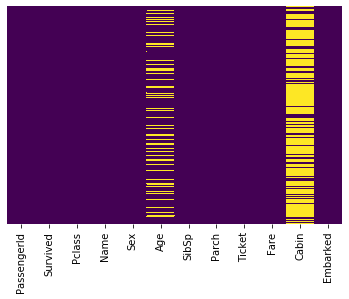

In [4]:
import seaborn as sns

sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Remove ID, Cabin and Ticket columns

In [5]:
titanic.drop(['PassengerId','Cabin', 'Ticket'],axis=1,inplace=True)

### Evaluate magnitude of numerical attrs

In [6]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Count survivors and survivors by Sex and by Pclass

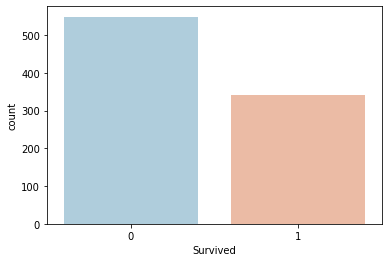

In [7]:
sns.countplot(x='Survived',data=titanic,palette='RdBu_r');

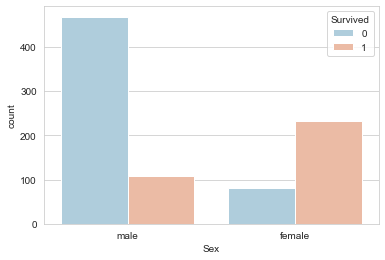

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Sex',hue='Survived',data=titanic,palette='RdBu_r')

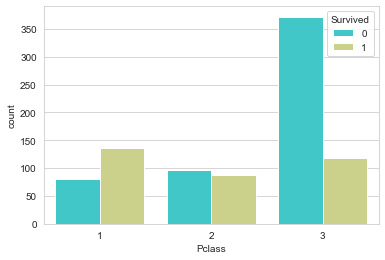

In [9]:
sns.countplot(x='Pclass', hue='Survived', data=titanic, palette='rainbow')

### Distribution of Age alone and its relationship with other variables

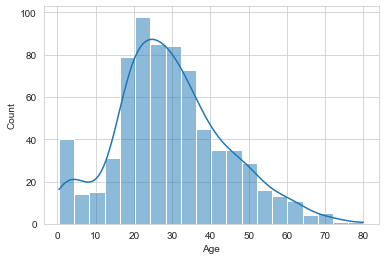

In [10]:
sns.histplot(data=titanic, x="Age", kde=True)

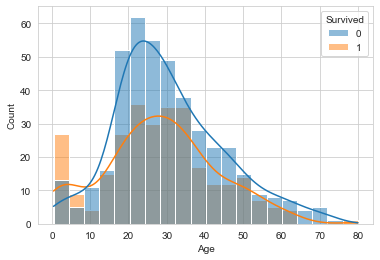

In [11]:
sns.histplot(data=titanic, x="Age", hue="Survived", kde=True)

In [42]:
sns.histplot(data=titanic, x="Embarked", hue="Survived", kde=True)

ValueError: Could not interpret value `Embarked` for parameter `x`

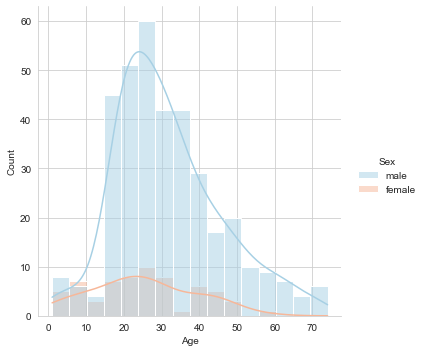

In [12]:
sns.displot(data=titanic[titanic.Survived == 0], x="Age", hue="Sex", palette='RdBu_r', kde=True)

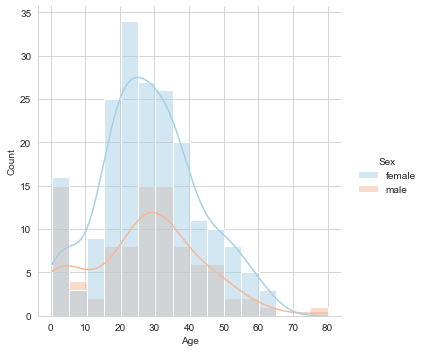

In [13]:
sns.displot(data=titanic[titanic.Survived == 1], x="Age", hue="Sex", palette='RdBu_r', kde=True)

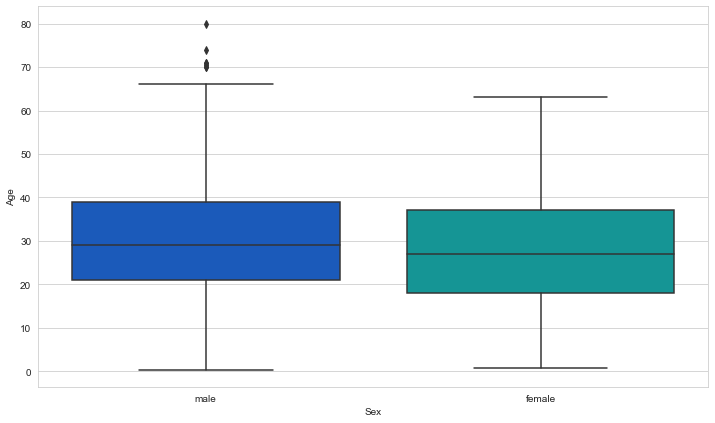

In [14]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Sex',y='Age',data=titanic,palette='winter')

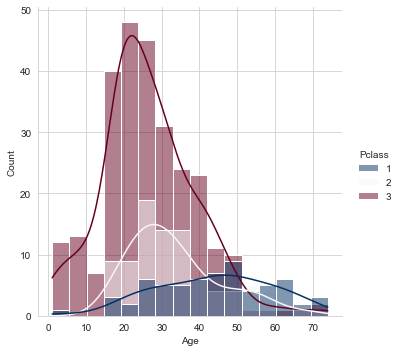

In [15]:
sns.displot(data=titanic[titanic.Survived == 0], x="Age", hue="Pclass", palette='RdBu_r', kde=True)

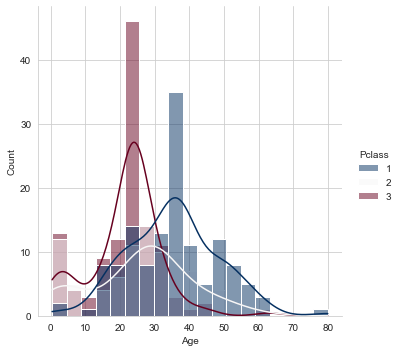

In [43]:
sns.displot(data=titanic[titanic.Survived == 1], x="Age", hue="Pclass", palette='RdBu_r', kde=True)

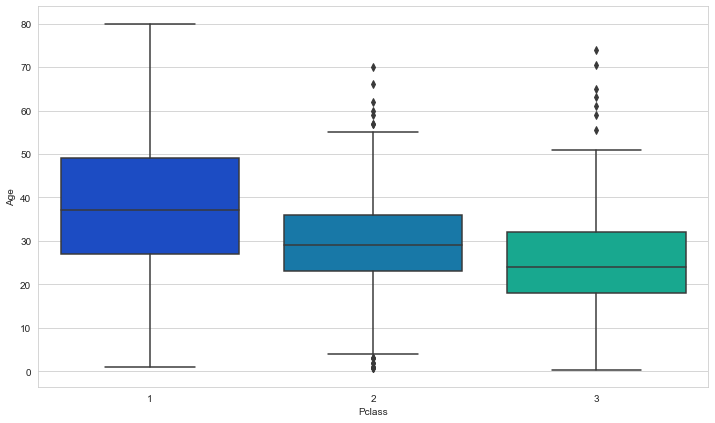

In [16]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='winter')

### Complete the age feature with the mean by class

In [17]:
class1 = titanic['Pclass']==1
class2 = titanic['Pclass']==2
class3 = titanic['Pclass']==3

In [18]:
print(titanic[class1]['Age'].median())
print(titanic[class2]['Age'].median())
print(titanic[class3]['Age'].median())

37.0
29.0
24.0


In [19]:
def input_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [20]:
titanic['Age'] = titanic[['Age','Pclass']].apply(input_age,axis=1)

### Verify if there is still null data and fix

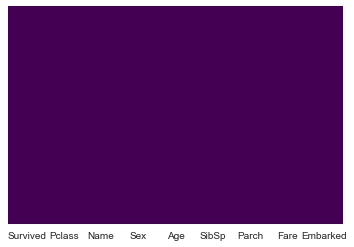

In [21]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [23]:
titanic.dropna(inplace=True)

In [41]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   male      889 non-null    uint8  
 7   Q         889 non-null    uint8  
 8   S         889 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.2 KB


### Transform textual attrs into binary ones and 

In [25]:
sex = pd.get_dummies(titanic['Sex'], drop_first=True)
embark = pd.get_dummies(titanic['Embarked'], drop_first=True)
titanic.drop(['Sex','Embarked','Name'],axis=1,inplace=True)
titanic = pd.concat([titanic,sex,embark],axis=1)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   male      889 non-null    uint8  
 7   Q         889 non-null    uint8  
 8   S         889 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.2 KB


In [26]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [27]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681,0.649044,0.086614,0.724409
std,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504,0.477538,0.281427,0.447063
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [28]:
titanic.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

### Normalize non binary features

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_titanic = titanic.copy()
scaler = scaler.fit(scaled_titanic[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])
scaled_titanic[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']] = scaler.transform(scaled_titanic[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']])

scaled_titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,0.655793,0.359378,0.065523,0.063742,0.062649,0.649044,0.086614,0.724409
std,0.486260,0.417350,0.165994,0.137963,0.134460,0.097003,0.477538,0.281427,0.447063
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.271174,0.000000,0.000000,0.015412,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.321438,0.000000,0.000000,0.028213,1.000000,0.000000,1.000000
75%,1.000000,1.000000,0.453380,0.125000,0.000000,0.060508,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
